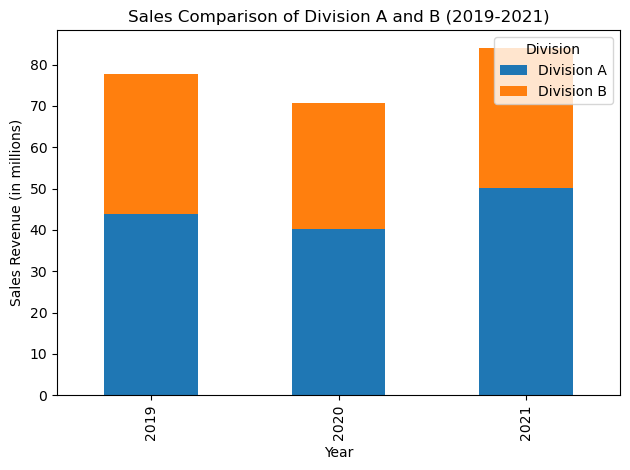

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_data(file_path):
    return pd.read_csv(file_path, skiprows=5, usecols=['Description', 'Act2019', 'Act2020', 'Proj2021']).query("Description == 'Sales Revenue'")

def create_stacked_bar_chart(data_a, data_b):
    combined_sales = pd.concat([data_a.iloc[0, 1:], data_b.iloc[0, 1:]], axis=1)
    combined_sales.columns = ['Division A', 'Division B']
    combined_sales.index = ['2019', '2020', '2021']

    combined_sales.plot(kind='bar', stacked=True)
    plt.title('Sales Comparison of Division A and B (2019-2021)')
    plt.ylabel('Sales Revenue (in millions)')
    plt.xlabel('Year')
    plt.legend(title='Division')
    plt.tight_layout()
    plt.show()


file_path_a = 'IncStmt-DivA.csv'
file_path_b = 'IncStmt-DivB.csv'

sales_a = load_and_process_data(file_path_a)
sales_b = load_and_process_data(file_path_b)

create_stacked_bar_chart(sales_a, sales_b)


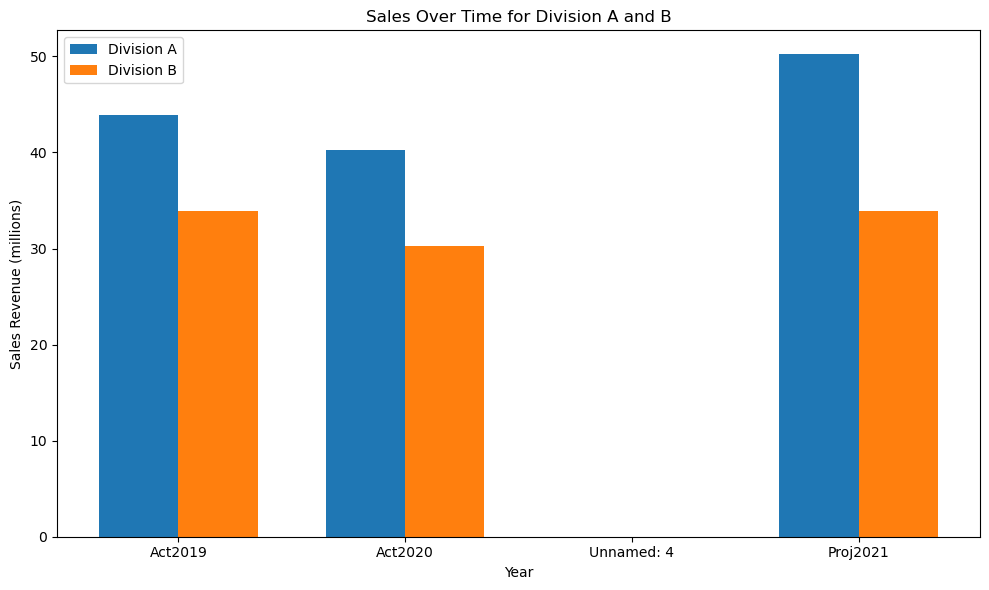

In [8]:
import numpy as np

# Extract the sales data more succinctly
sales_a = div_a.loc[div_a['Description'] == 'Sales Revenue', div_a.columns[2:]].astype(float).values.flatten()
sales_b = div_b.loc[div_b['Description'] == 'Sales Revenue', div_b.columns[2:]].astype(float).values.flatten()
years = div_a.columns[2:]

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(years))

plt.bar(index - bar_width / 2, sales_a, width=bar_width, label='Division A')
plt.bar(index + bar_width / 2, sales_b, width=bar_width, label='Division B')

plt.xlabel('Year')
plt.ylabel('Sales Revenue (millions)')
plt.title('Sales Over Time for Division A and B')
plt.xticks(index, years)
plt.legend()
plt.tight_layout()
plt.show()


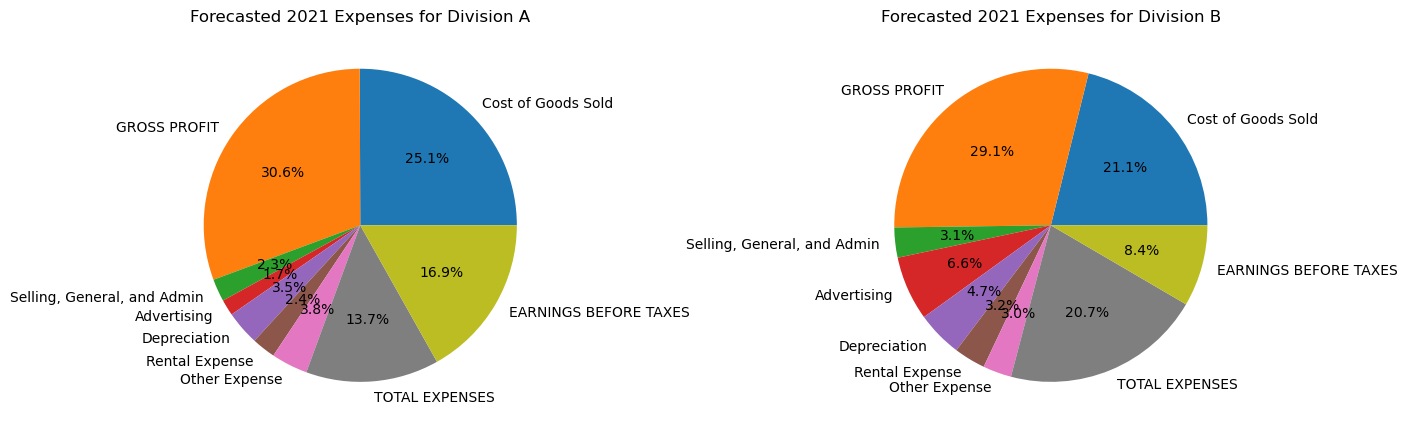

In [9]:
# Extract and process expenses data in one step
div_a_expenses = div_a.loc[div_a['Description'] != 'Sales Revenue', 'Proj2021'].apply(pd.to_numeric, errors='coerce').dropna()
div_b_expenses = div_b.loc[div_b['Description'] != 'Sales Revenue', 'Proj2021'].apply(pd.to_numeric, errors='coerce').dropna()

# For labels, we need to ensure they align with the filtered 'Proj2021' data
labels_a = div_a.loc[div_a_expenses.index, 'Description']
labels_b = div_b.loc[div_b_expenses.index, 'Description']

# Plotting the pie charts for each division
plt.figure(figsize=(14, 7))

# Division A
plt.subplot(1, 2, 1)
plt.pie(div_a_expenses, labels=labels_a, autopct='%1.1f%%')
plt.title('Forecasted 2021 Expenses for Division A')

# Division B
plt.subplot(1, 2, 2)
plt.pie(div_b_expenses, labels=labels_b, autopct='%1.1f%%')
plt.title('Forecasted 2021 Expenses for Division B')

plt.tight_layout()
plt.show()
